In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random


In [22]:
df=pd.read_csv("mibilegame.csv")

In [24]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [25]:
df.shape

(90189, 5)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [27]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

In [28]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [29]:
from scipy.stats import shapiro
shapiro(df['sum_gamerounds'])

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.14405560493469238, pvalue=0.0)

In [62]:
df_a=df[df["version"]=='gate_30']
df_a

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
13,2179,gate_30,39,True,False
...,...,...,...,...,...
90179,9998576,gate_30,14,True,False
90180,9998623,gate_30,7,False,False
90182,9999178,gate_30,21,True,False
90183,9999349,gate_30,10,False,False


In [26]:
#dd=df.query('`version`=="gate_30"')

In [32]:
df_b=df[df["version"]=='gate_40']
df_b

,userid,version,sum_gamerounds,retention_1,retention_7
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
7,1444,gate_40,2,False,False
...,...,...,...,...,...
90181,9998733,gate_40,10,True,False
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90187,9999768,gate_40,51,True,False


In [33]:
df.sum_gamerounds.mean()

51.8724567297564

In [34]:
df_a.sum_gamerounds.mean()*100

5245.626398210291

In [38]:
df_b.sum_gamerounds.mean()*100

5129.877552814966

In [39]:
max_rounds=49854.000000
normalized_mean = df.sum_gamerounds.mean() / max_rounds
gate30_sumgamerounds = np.random.binomial(len(df_a), normalized_mean, 10000) / len(df_a)

In [40]:
gate30_sumgamerounds

array([0.00073826, 0.0010962 , 0.00102908, ..., 0.00102908, 0.00098434,
       0.00098434])

In [41]:
max_rounds=49854.000000
normalized_mean = df.sum_gamerounds.mean() / max_rounds
gate40_sumgamerounds = np.random.binomial(len(df_b), normalized_mean, 10000) / len(df_b)

In [42]:
gate40_sumgamerounds

array([0.00085735, 0.00112115, 0.00103322, ..., 0.00085735, 0.00140693,
       0.00085735])

In [44]:
p_diffs =gate40_sumgamerounds-gate30_sumgamerounds
p_diffs 

array([ 1.19095095e-04,  2.49533002e-05,  4.13404760e-06, ...,
       -1.71732645e-04,  4.22593500e-04, -1.26989916e-04])

In [45]:
p_diffs.mean()

-9.287127605597483e-07

In [46]:
ab_data_diff=df_b.sum_gamerounds.mean()-df_a.sum_gamerounds.mean()

In [49]:

normalized_mean_ab_data_diff = (df_b.sum_gamerounds.mean() - df_a.sum_gamerounds.mean()) / max_rounds

In [50]:
normalized_mean_ab_data_diff

-2.321756436701667e-05

In [51]:
(p_diffs > normalized_mean_ab_data_diff).mean() * 100

55.7

In [73]:
(p_diffs < normalized_mean_ab_data_diff).mean() *100

44.3

# Another way

<AxesSubplot:>

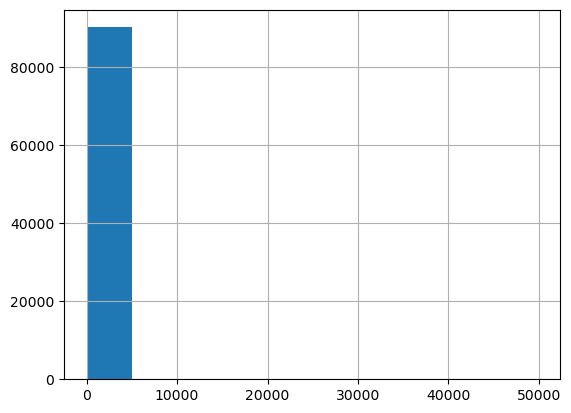

In [53]:
df['sum_gamerounds'].hist()

In [54]:
from scipy.stats import shapiro
shapiro(df['sum_gamerounds'])

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.14405560493469238, pvalue=0.0)

In [55]:
from scipy import stats

In [63]:
stats.mannwhitneyu(df_a.sum_gamerounds, df_b.sum_gamerounds, alternative='two-sided')

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)

از لحاظ آماری معنا ندارد چون پی ولیو بزرگتر از  0.05 است 
پس شانسی میانگین کسایی که تبلیغ را ندید ه اند بیشتر شده است.

In [64]:
stats.mannwhitneyu(df_a.sum_gamerounds, df_b.sum_gamerounds, alternative='greater')

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.025104403860221274)

In [67]:
stats.mannwhitneyu(df_a.sum_gamerounds, df_b.sum_gamerounds, alternative='less')

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.9748956111482728)

5.0